In [65]:
import ImportData
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, metrics
import numpy as np
import scipy
import copy
import matplotlib.pyplot as plt

In [6]:
df = ImportData.importDataAsTable(False, False)

In [7]:
df.head()

,IC50,cell_line,drug_id
0,5.457453,ES3,176870
1,6.177945,ES5,176870
2,3.954488,EW-11,176870
3,5.429563,NCI-H1395,176870
4,6.239001,NCI-H1770,176870


In [76]:
train_df, test_df = train_test_split(df, test_size=0.2)
y_test = np.array(test_df["IC50"])

In [77]:
def f1_score(y_test, y_pred):
    y_test_binary = copy.deepcopy(y_test)
    y_test_binary = preprocessing.binarize(y_test_binary.reshape(1,-1), threshold=5, copy=False)[0]
    y_pred_binary = copy.deepcopy(y_pred)
    y_pred_binary = preprocessing.binarize(y_pred_binary.reshape(1,-1), threshold=5, copy=False)[0]
    return metrics.f1_score(y_test_binary, y_pred_binary)

# Based on the cell_line average

In [9]:
train_cell_line_mean = train_df.groupby(['cell_line'])['IC50'].mean()

In [69]:
y_pred_cell_line = np.array([train_cell_line_mean[cell_line] for cell_line in test_df["cell_line"]])

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred_cell_line))

3.1944096507696824

In [71]:
scipy.stats.pearsonr(y_test, y_pred_cell_line)

(0.1977430642893962, 1.7112782039203935e-28)

In [78]:
f1_score(y_test, y_pred_cell_line)

0.017526777020447904

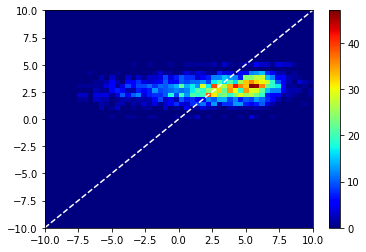

In [50]:
plt.hist2d(y_test, y_pred_cell_line, (50, 50), cmap=plt.cm.jet, range=[[-10,10],[-10,10]] )
plt.plot([-10, 10], [-10, 10], ls="--", c="1")
plt.colorbar()

# Based on the drug_id average

In [13]:
train_drug_id_mean = train_df.groupby(['drug_id'])['IC50'].mean()

In [80]:
y_pred_drug_id = np.array([train_drug_id_mean[drug_id] for drug_id in test_df["drug_id"]])

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred_drug_id))

1.823602003332211

In [82]:
scipy.stats.pearsonr(y_test, y_pred_drug_id)

(0.8249253406877242, 0.0)

In [83]:
f1_score(y_test, y_pred_drug_id)

0.6100478468899522

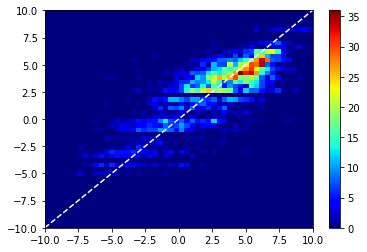

In [51]:
plt.hist2d(y_test, y_pred_drug_id, (50, 50), cmap=plt.cm.jet, range=[[-10,10],[-10,10]] )
plt.plot([-10, 10], [-10, 10], ls="--", c="1")
plt.colorbar()

# Based on the drug_id average and cell_line average

In [85]:
train_df.loc[:,"drug_id_average"] = [train_drug_id_mean[drug_id] for drug_id in train_df["drug_id"]]
train_df.loc[:,"cell_line_average"] = [train_cell_line_mean[cell_line] for cell_line in train_df["cell_line"]]

test_df.loc[:,"drug_id_average"] = [train_drug_id_mean[drug_id] for drug_id in test_df["drug_id"]]
test_df.loc[:,"cell_line_average"] = [train_cell_line_mean[cell_line] for cell_line in test_df["cell_line"]]

/home/soeren/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/soeren/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [86]:
X_train = train_df[['drug_id_average', 'cell_line_average']]
y_train = train_df['IC50']

In [87]:
reg = LinearRegression().fit(X_train, y_train)

In [88]:
y_pred = np.array(reg.predict(test_df[['drug_id_average', 'cell_line_average']]))

In [89]:
f1_score(y_test, y_pred)

0.6690307328605201

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.730882767376305

In [22]:
scipy.stats.pearsonr(y_test, y_pred)

(0.8467616723142585, 0.0)

|                                                | RMSE  | rPearson | F1 score |
|------------------------------------------------|-------|----------|---|
| pairwiseMKL                                    | 1.682 | 0.858    |   |
| KronRLS-MKL                                    | 1.899 | 0.849    |   |
| cell_line average                              | 3.201 | 0.196    |   |
| drug_id average                                | 1.926 | 0.807    |   |
| weighted drug_id average and cell_line average | 1.765 | 0.841    |   |
|

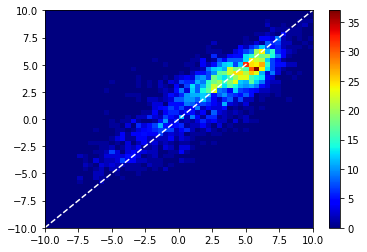

In [52]:
plt.hist2d(y_test, y_pred, (50, 50), cmap=plt.cm.jet, range=[[-10,10],[-10,10]] )
plt.plot([-10, 10], [-10, 10], ls="--", c="1")
plt.colorbar()